In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.size

140000

In [7]:
df.shape

(10000, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.drop(columns = ["RowNumber","CustomerId","Surname"],inplace = True)

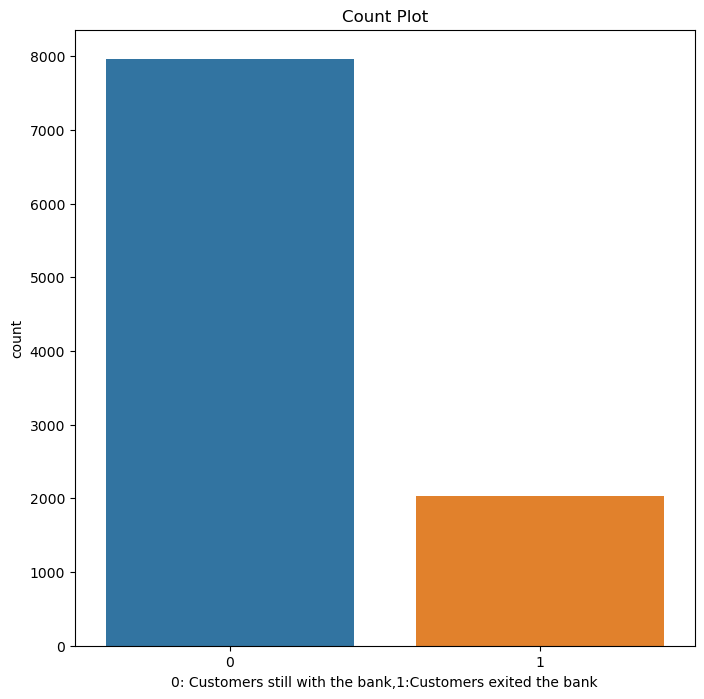

In [10]:

plt.figure(figsize=(8,8))
sns.countplot(x = 'Exited',data = df)
plt.title("Count Plot")
plt.xlabel('0: Customers still with the bank,1:Customers exited the bank')
plt.ylabel('count')
plt.show()

In [11]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
df.isnull().any()

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [13]:
geography = pd.get_dummies(df['Geography'])

In [14]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [15]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [16]:
gender = pd.get_dummies(df['Gender'])

In [17]:
df = pd.concat([df,geography,gender],axis = 1)

In [18]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,True,False,False,False,True
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,True,False,False,False,True
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,True,False,False,True,False
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,False,True,False,False,True


In [19]:
df.drop(columns = ['Geography','Gender'],inplace = True)

In [20]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,True,False,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,True,False,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,True,False,False,True,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,False,True,False,False,True


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x = df.drop('Exited',axis = 1)
y = df['Exited']

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 0)

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [25]:
import keras
from keras.models import Sequential
from keras.layers import Dense
     

classifier = Sequential()    
classifier.add(Dense(units = 6,kernel_initializer='he_uniform',activation = 'relu',input_dim = 13))    
classifier.add(Dense(units = 6,kernel_initializer='he_uniform',activation = 'relu'))
classifier.add(Dense(units = 1,kernel_initializer='glorot_uniform',activation = 'sigmoid'))

In [26]:
classifier.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [27]:
model_history = classifier.fit(x_train,y_train,batch_size = 10,epochs = 100,validation_split = 0.33)

Epoch 1/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5674 - accuracy: 0.7718 - val_loss: 0.5030 - val_accuracy: 0.7989
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4734 - accuracy: 0.7992 - val_loss: 0.4627 - val_accuracy: 0.7989
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4435 - accuracy: 0.8037 - val_loss: 0.4497 - val_accuracy: 0.7974
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4320 - accuracy: 0.8106 - val_loss: 0.4435 - val_accuracy: 0.8008
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4257 - accuracy: 0.8141 - val_loss: 0.4386 - val_accuracy: 0.8012
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4202 - accuracy: 0.8199 - val_loss: 0.4334 - val_accuracy: 0.8054
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4144 - accuracy: 0.8242 - val_loss: 0.4283 - val_accuracy: 0.8114

Epoch 58/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3307 - accuracy: 0.8658 - val_loss: 0.3532 - val_accuracy: 0.8573
Epoch 59/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3297 - accuracy: 0.8634 - val_loss: 0.3537 - val_accuracy: 0.8576
Epoch 60/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3292 - accuracy: 0.8623 - val_loss: 0.3541 - val_accuracy: 0.8595
Epoch 61/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3305 - accuracy: 0.8668 - val_loss: 0.3545 - val_accuracy: 0.8557
Epoch 62/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3297 - accuracy: 0.8640 - val_loss: 0.3540 - val_accuracy: 0.8588
Epoch 63/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3301 - accuracy: 0.8645 - val_loss: 0.3553 - val_accuracy: 0.8565
Epoch 64/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3291 - accuracy: 0.8647 - val_loss: 0.3555 - val_accuracy:

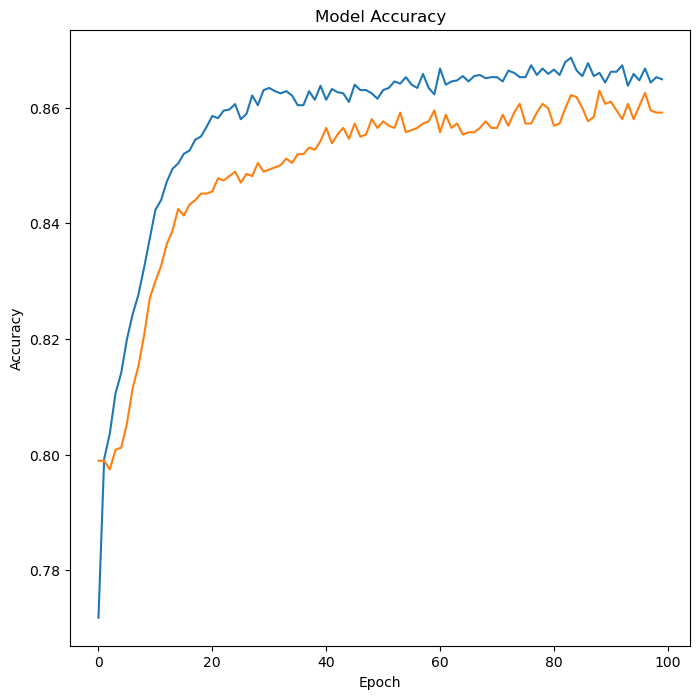

In [28]:
plt.figure(figsize = (8,8))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [29]:
y_pred = classifier.predict(x_test)

63/63 [==============================] - 0s 806us/step


In [30]:
print(y_pred[:5])

[[0.16134615]
 [0.26183122]
 [0.08474488]
 [0.03482398]
 [0.0303939 ]]


In [31]:
#Let us use confusion matrix with cutoff value as 0.5
y_pred = (y_pred > 0.5).astype(int)
print(y_pred[:5])

[[0]
 [0]
 [0]
 [0]
 [0]]


In [32]:
#Making the Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1533   62]
 [ 202  203]]


In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.868